In [ ]:
#turn on Runtime type to TPU

#Imports section

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from tqdm import tqdm
import seaborn as sns

#Data fetcing

In [ ]:
# Fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
# Access features (pixel values) and labels
X, y = mnist['data'].astype('float32'), mnist['target'].astype('int')

X = np.array(X)
y = np.array(y)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


#Data preview

##Data lookup

In [ ]:
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"The lables are: {np.unique(y)}")
print("X preview\n",X)
print("Y preview\n",y)
print(f"Max feature value: {np.max(X)}")
print(f"Min feature value: {np.min(X)}")

Number of samples: 70000
Number of features: 784
The lables are: [0 1 2 3 4 5 6 7 8 9]
X preview
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Y preview
 [5 0 4 ... 4 5 6]
Max feature value: 255.0
Min feature value: 0.0


##Data distribution
We can see that the distribution is not uniform, it may effect the result (The digit 2 has the most training examples and digit 5 has the fewest)

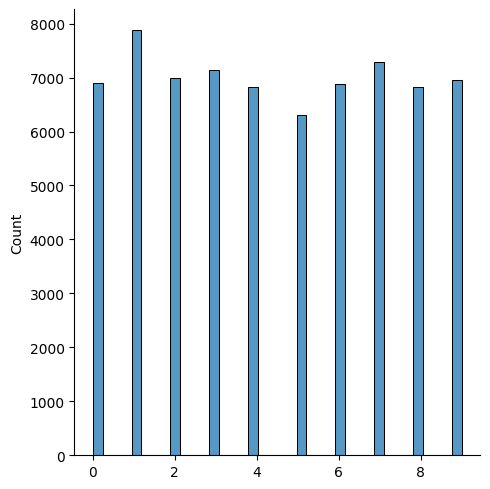

In [ ]:
sns.displot(y)

#Data pre proccessing

##Normalization
Normalization process can improve our running time.
Since X values range is [0,255], we can normalize that by dividing in 255 such that each value will be in range of [0,1].

In [ ]:
X /= 255
X = np.hstack((np.ones((X.shape[0], 1)), X))

##Data partition

In [ ]:
def data_preparation():
  return train_test_split(X, y, test_size=1/7)


X_train, X_test, y_train, y_test = data_preparation()

#Visualization

In [ ]:
def show_losses_per_iteration(train_losses, test_losses):
  # Performance Visualization
  plt.figure(figsize=(10, 5))

  # Plot Losses
  plt.plot(train_losses, label='Training Loss', color='blue')
  plt.plot(test_losses, '--', label='Test Loss', color='orange')
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

#Linear Rigression model

C1. Formulate the digit classification problem as a linear regression task


I chose to use the "1 vs All" solution with argmax predictor that can produce a better predictor (We can't find a good linear solution to saperate all digits, instead we are creating a linear solution for each digits against others).

In the solution I used an iterative solution with gradient decent multipling by learning rate.

How to define a "good' learning rate?
In each iteration to avoid situation the delta between 2 iterations will pass the minimum and we want to decrease the step size.
(After some executions I got the constant learning rate 0.025 as a good learning rate that can produce good accuracy very fast.)





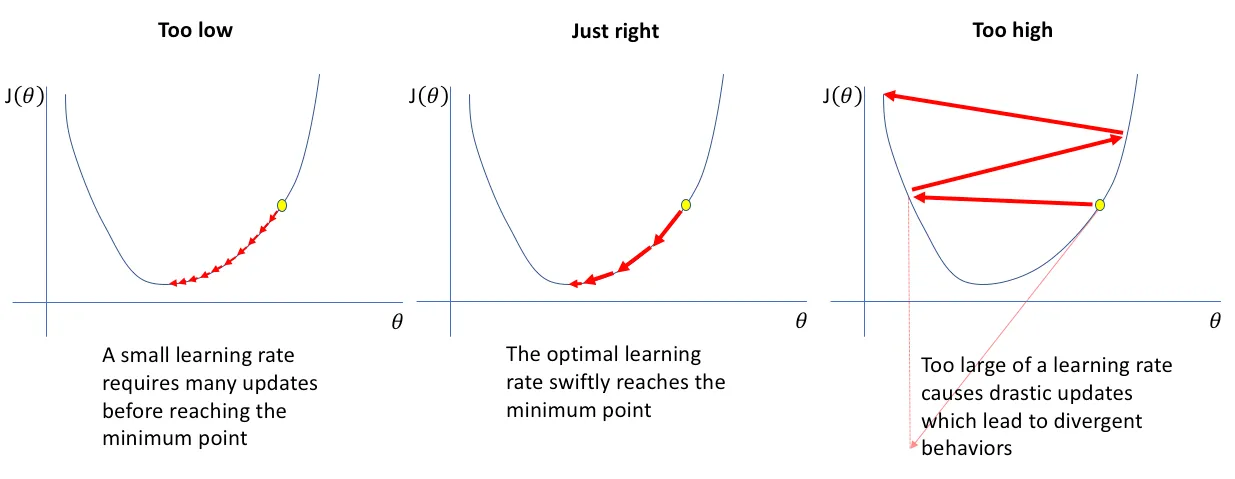

In [ ]:
def linear_regression_gradient_decent(X_train, X_test, y_train, y_test):
  # Initialize weights
  w = np.zeros(X_train.shape[1])

  # Number of iterations and learning rate
  num_iterations = 100
  learning_rate = 0.025
  train_losses = []
  test_losses = []

  # Implement linear regression using the least squares method
  for iteration in range(num_iterations):
    # Calculate predictions
    y_pred = X_train @ w

    # Calculate the mean squared error (loss)
    mse = np.mean((y_pred - y_train)**2)
    train_losses.append(mse)
    mse_test = np.mean(((X_test @ w) - y_test)**2)
    test_losses.append(mse_test)
    # Print the loss per 10 iterations
    if (iteration % 10 == 0):
      print(f"Iteration {iteration + 1}/{num_iterations}, Loss: {mse}")

    # Update weights using gradient descent
    gradient = 2/X_train.shape[0] * X_train.T @ (X_train @ w - y_train)

    w -= learning_rate * gradient


  return w, train_losses, test_losses

In [ ]:
# 1 vs all
def one_vs_all(X_train, X_test, y_train, y_test, digit):
  print(f"Start for digit: {digit}")
  w, train_losses, test_losses = linear_regression_gradient_decent(X_train,
                                                                   X_test,
                                                                   np.where(y_train == digit, 1, -1),
                                                                   np.where(y_test == digit, 1, -1))
  show_losses_per_iteration(train_losses, test_losses)
  return w


Start for digit: 0
Iteration 1/80, Loss: 1.0
Iteration 11/80, Loss: 0.39936912332321556
Iteration 21/80, Loss: 0.24870078588763614
Iteration 31/80, Loss: 0.18511840932791487
Iteration 41/80, Loss: 0.15673893422100563
Iteration 51/80, Loss: 0.1432878118276522
Iteration 61/80, Loss: 0.1362914338723104
Iteration 71/80, Loss: 0.13216481368573527


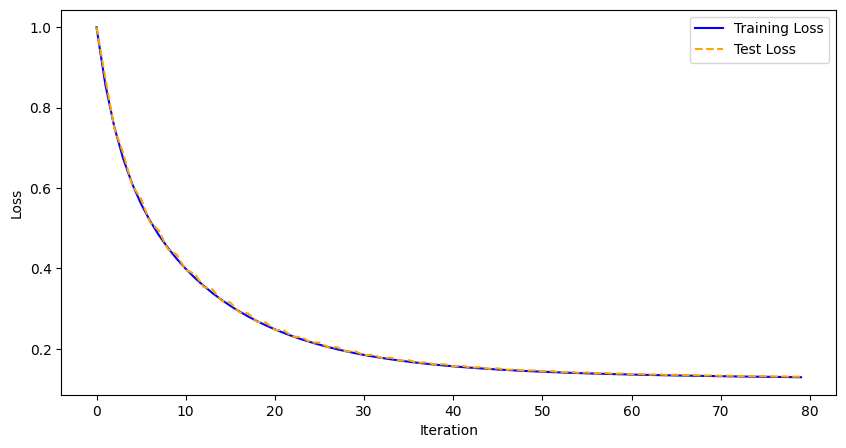

Start for digit: 1
Iteration 1/80, Loss: 1.0
Iteration 11/80, Loss: 0.4705987629589018
Iteration 21/80, Loss: 0.28535740063267956
Iteration 31/80, Loss: 0.20691699612897949
Iteration 41/80, Loss: 0.1723995166993298
Iteration 51/80, Loss: 0.15649722550214998
Iteration 61/80, Loss: 0.14863393808201877
Iteration 71/80, Loss: 0.144326391728608


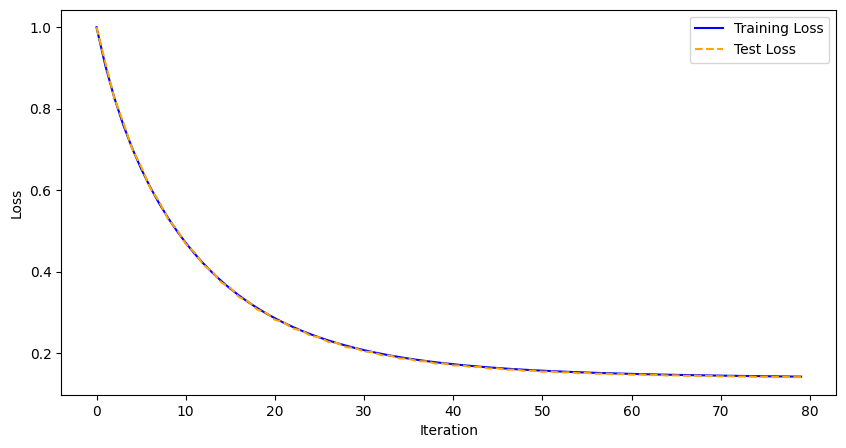

Start for digit: 2
Iteration 1/80, Loss: 1.0
Iteration 11/80, Loss: 0.5005362210016578
Iteration 21/80, Loss: 0.33104169944438194
Iteration 31/80, Loss: 0.25963670803017164
Iteration 41/80, Loss: 0.2272000602571972
Iteration 51/80, Loss: 0.21122263183497197
Iteration 61/80, Loss: 0.20244519780990905
Iteration 71/80, Loss: 0.19695199886911902


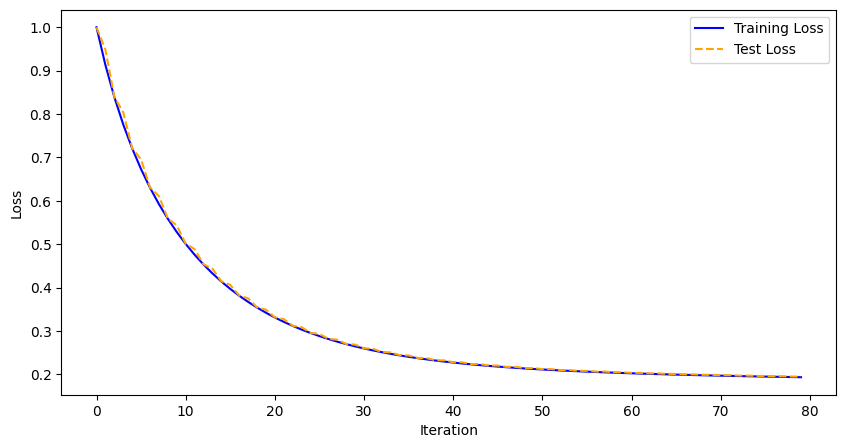

Start for digit: 3
Iteration 1/80, Loss: 1.0
Iteration 11/80, Loss: 0.5081484320106024
Iteration 21/80, Loss: 0.3465053261824718
Iteration 31/80, Loss: 0.2784694997734596
Iteration 41/80, Loss: 0.24775441238796367
Iteration 51/80, Loss: 0.2327515123163318
Iteration 61/80, Loss: 0.22457064618764241
Iteration 71/80, Loss: 0.21946551823244329


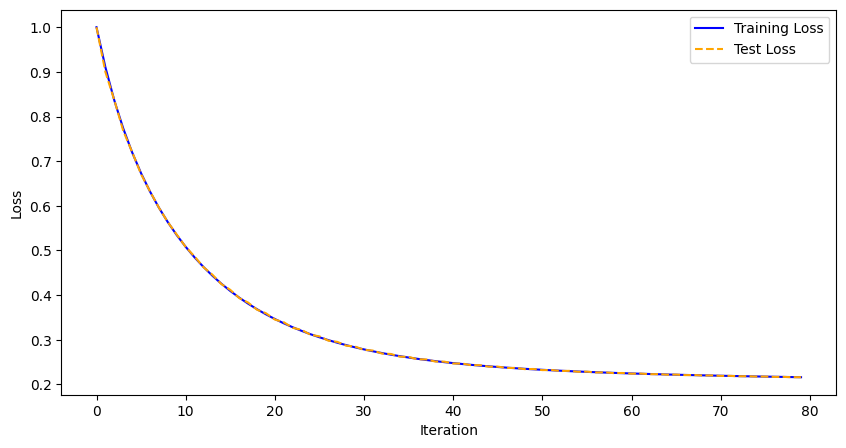

Start for digit: 4
Iteration 1/80, Loss: 1.0
Iteration 11/80, Loss: 0.5086005084867767
Iteration 21/80, Loss: 0.33616312499406353
Iteration 31/80, Loss: 0.26305694331138735
Iteration 41/80, Loss: 0.23011969821441491
Iteration 51/80, Loss: 0.21417174950863757
Iteration 61/80, Loss: 0.2056230123606298
Iteration 71/80, Loss: 0.20042083661225524


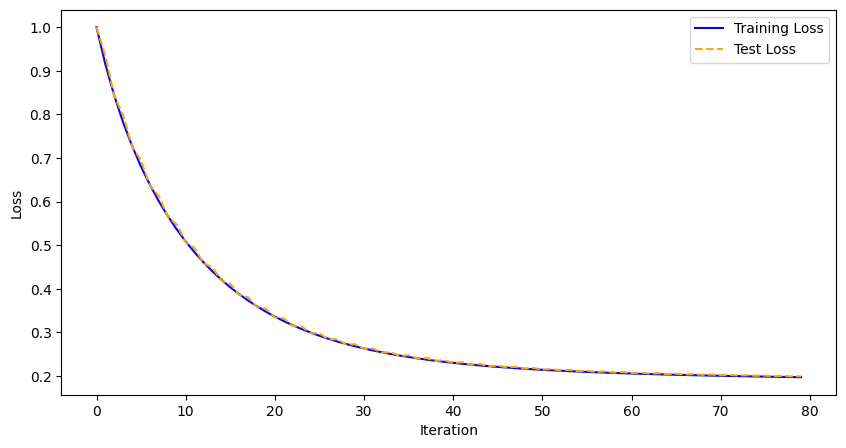

Start for digit: 5
Iteration 1/80, Loss: 1.0
Iteration 11/80, Loss: 0.5391832523577639
Iteration 21/80, Loss: 0.36378222815462274
Iteration 31/80, Loss: 0.28800367376111696
Iteration 41/80, Loss: 0.25366324977509797
Iteration 51/80, Loss: 0.23712377879773525
Iteration 61/80, Loss: 0.22841332471648987
Iteration 71/80, Loss: 0.2232630215615069


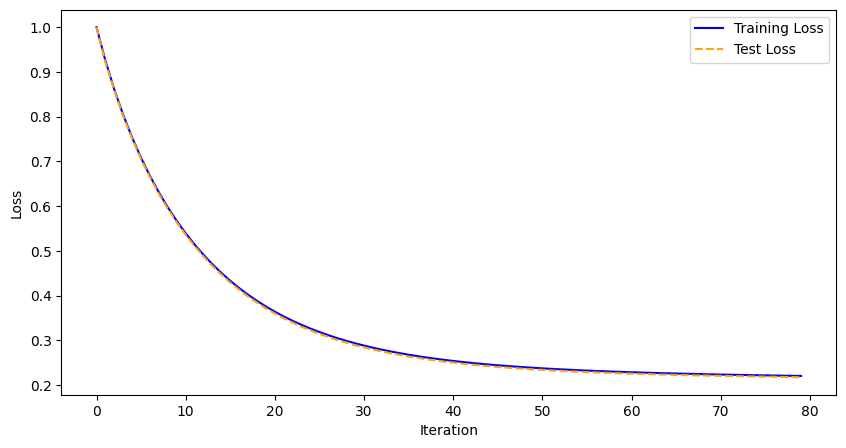

Start for digit: 6
Iteration 1/80, Loss: 1.0
Iteration 11/80, Loss: 0.4643589145615988
Iteration 21/80, Loss: 0.29275701830567363
Iteration 31/80, Loss: 0.22064911553344052
Iteration 41/80, Loss: 0.1878848864934648
Iteration 51/80, Loss: 0.1718431839846548
Iteration 61/80, Loss: 0.1631315564493047
Iteration 71/80, Loss: 0.1577475399325455


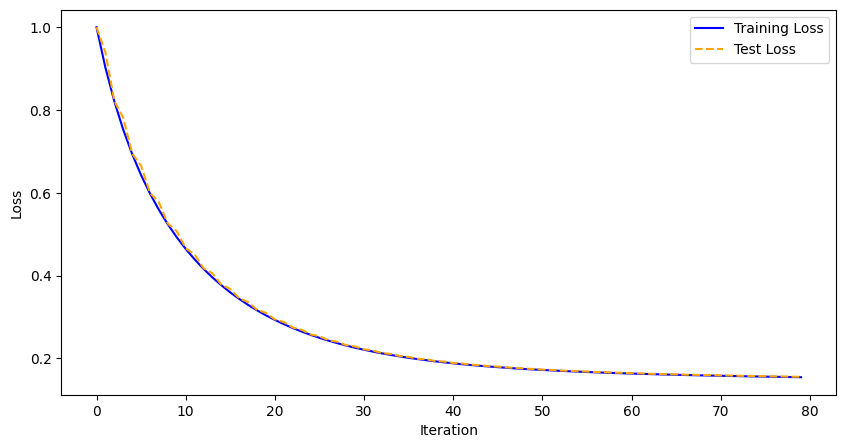

Start for digit: 7
Iteration 1/80, Loss: 1.0
Iteration 11/80, Loss: 0.47535287561018896
Iteration 21/80, Loss: 0.3015147489541351
Iteration 31/80, Loss: 0.23010434249781442
Iteration 41/80, Loss: 0.19897333604935014
Iteration 51/80, Loss: 0.18456319820121025
Iteration 61/80, Loss: 0.17728623617158262
Iteration 71/80, Loss: 0.17314016642029456


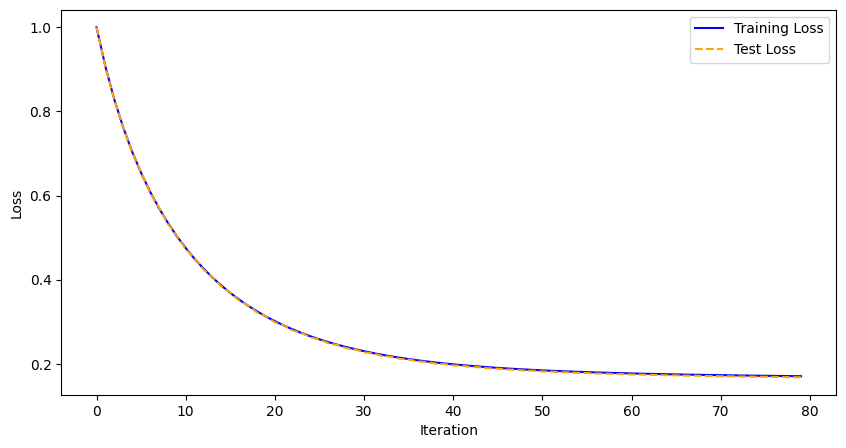

Start for digit: 8
Iteration 1/80, Loss: 1.0
Iteration 11/80, Loss: 0.5714801906668027
Iteration 21/80, Loss: 0.4034151334982659
Iteration 31/80, Loss: 0.3304592083390554
Iteration 41/80, Loss: 0.29619904837514405
Iteration 51/80, Loss: 0.2784312895405438
Iteration 61/80, Loss: 0.2679677242768008
Iteration 71/80, Loss: 0.2609037964911817


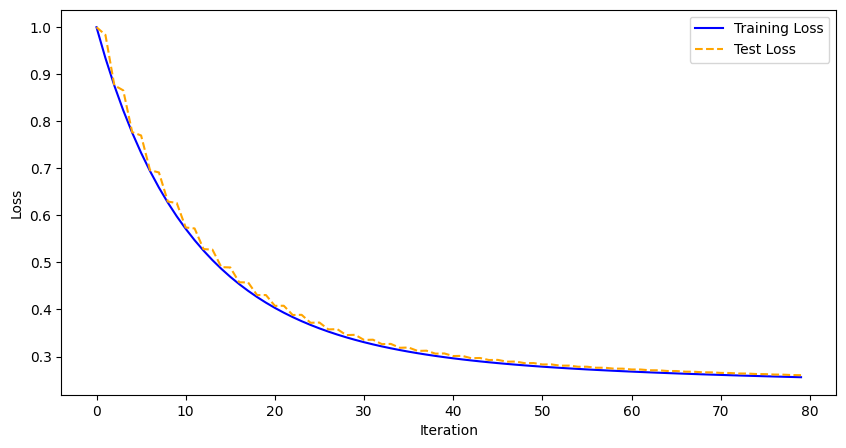

Start for digit: 9
Iteration 1/80, Loss: 1.0
Iteration 11/80, Loss: 0.5539179826383485
Iteration 21/80, Loss: 0.38711941822048085
Iteration 31/80, Loss: 0.3140683026428692
Iteration 41/80, Loss: 0.28044155381378477
Iteration 51/80, Loss: 0.26385645302012833
Iteration 61/80, Loss: 0.2548127611160346
Iteration 71/80, Loss: 0.2492259954436153


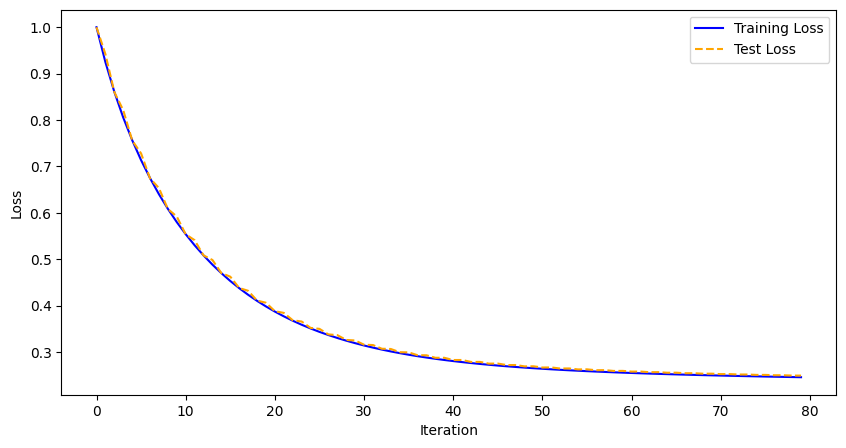

In [ ]:
W = []
for i in range(0, 10):
  w_i = one_vs_all(X_train, X_test, y_train, y_test, i)
  W.append(w_i)

##C2. Evaluate the performance of the linear regression models on the test set

In [ ]:
def predict(X):
  return np.argmax([X @ W[j] for j in range(10)])

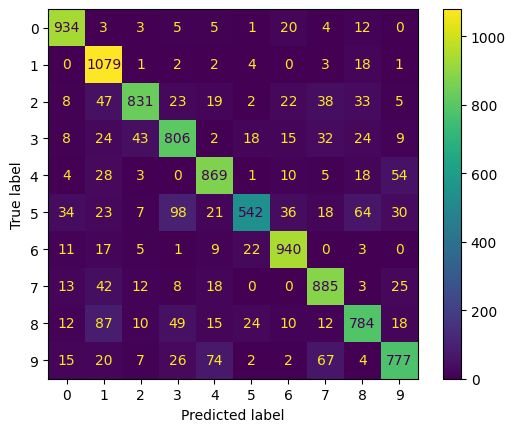

ACC: 84.47%


In [ ]:
y_pred = np.array([predict(X_test[i]) for i in range(X_test.shape[0])])
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [i for i in range(10)])

cm_display.plot()
plt.show()

print(f"ACC: {metrics.accuracy_score(y_test, y_pred):.2%}")

For the digit 0 the confusion matrix is:


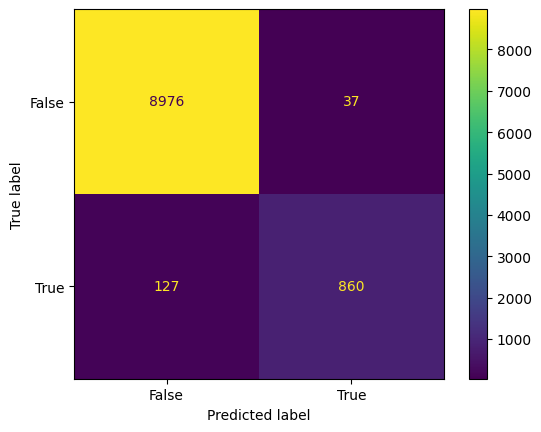

For the digit 0 the acc is: 98.36%
For the digit 0 the sensetivity is: 87.13%
############################################################
For the digit 1 the confusion matrix is:


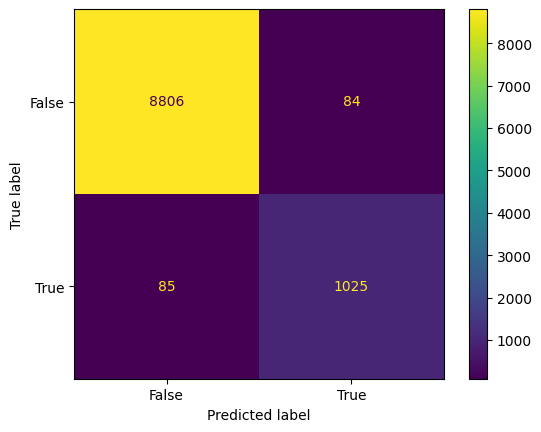

For the digit 1 the acc is: 98.31%
For the digit 1 the sensetivity is: 92.34%
############################################################
For the digit 2 the confusion matrix is:


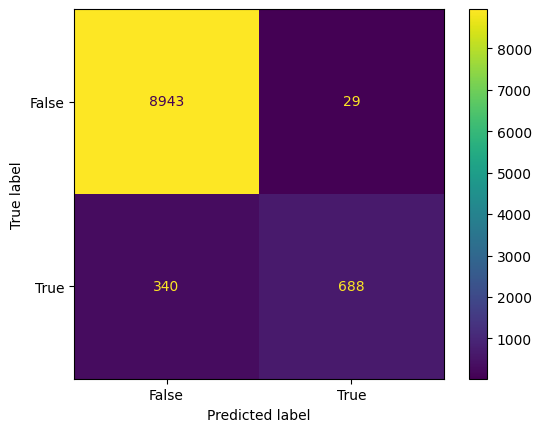

For the digit 2 the acc is: 96.31%
For the digit 2 the sensetivity is: 66.93%
############################################################
For the digit 3 the confusion matrix is:


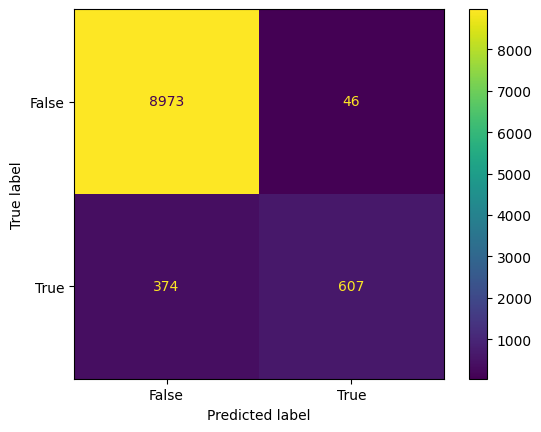

For the digit 3 the acc is: 95.80%
For the digit 3 the sensetivity is: 61.88%
############################################################
For the digit 4 the confusion matrix is:


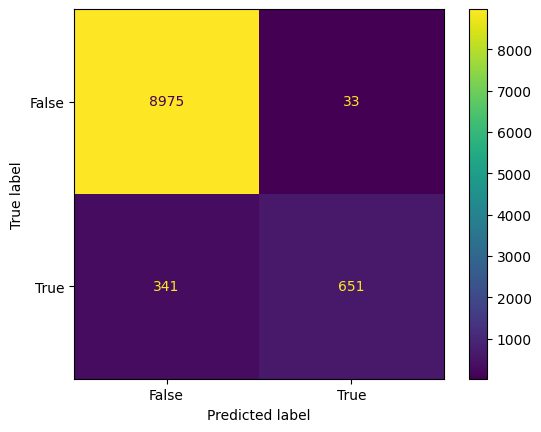

For the digit 4 the acc is: 96.26%
For the digit 4 the sensetivity is: 65.62%
############################################################
For the digit 5 the confusion matrix is:


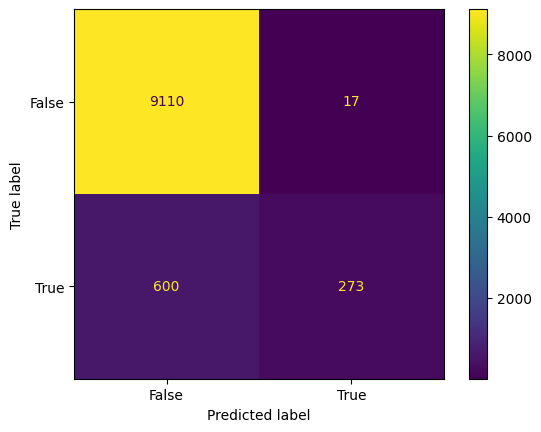

For the digit 5 the acc is: 93.83%
For the digit 5 the sensetivity is: 31.27%
############################################################
For the digit 6 the confusion matrix is:


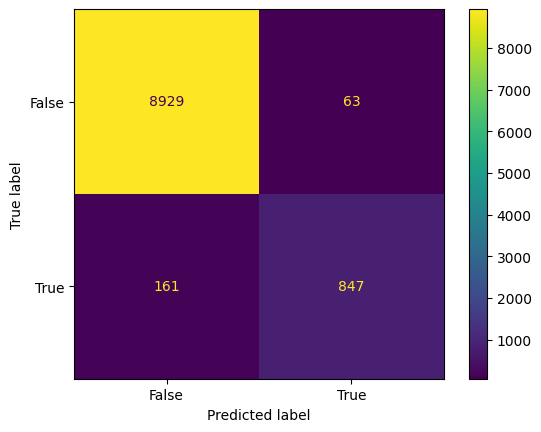

For the digit 6 the acc is: 97.76%
For the digit 6 the sensetivity is: 84.03%
############################################################
For the digit 7 the confusion matrix is:


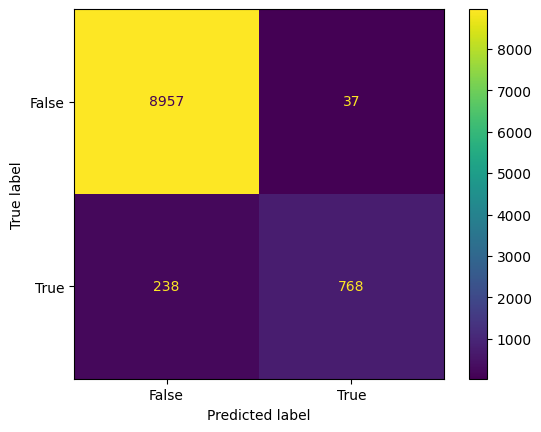

For the digit 7 the acc is: 97.25%
For the digit 7 the sensetivity is: 76.34%
############################################################
For the digit 8 the confusion matrix is:


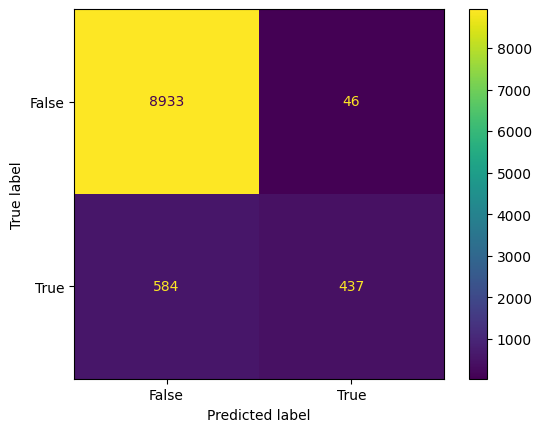

For the digit 8 the acc is: 93.70%
For the digit 8 the sensetivity is: 42.80%
############################################################
For the digit 9 the confusion matrix is:


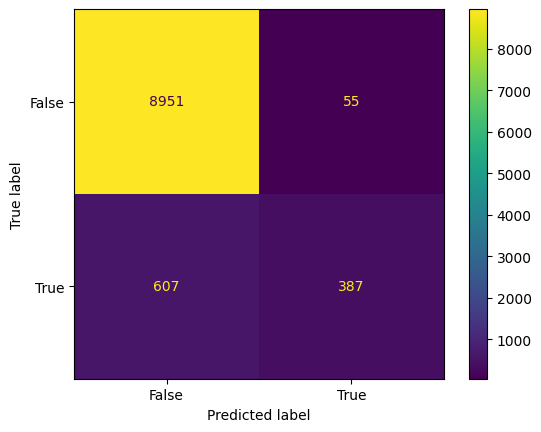

For the digit 9 the acc is: 93.38%
For the digit 9 the sensetivity is: 38.93%
############################################################


In [ ]:
for i in range(10):
  y_pred = np.where(X_test @ W[i] > 0, 1, -1)
  y_true = np.where(y_test == i, 1, -1)
  confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
  print(f"For the digit {i} the confusion matrix is:")
  cm_display.plot()
  plt.show()
  TP = confusion_matrix[1,1] # true positive
  FN = confusion_matrix[1,0] # false negatives
  print(f"For the digit {i} the acc is: {metrics.accuracy_score(y_true, y_pred):.2%}")
  print(f"For the digit {i} the sensetivity is: {TP/(TP+FN):.2%}")
  print("#"*60)

#C3. Compare the results obtained using linear regression with those achieved through the perceptron algorithm and softmax regression, as outlined in the earlier parts of the assignment

1. If we want to compare the results, we need first to notice that only the softmat regression was a pure multiclass model, hence probably for the reqular multiclass classifications the softmax is the most effective one.

2. If we're ignoring the implementation of each model, we can say that the perceptron algorithm and the softmax regresion were the best models to use for this problem.

3. In both cases the linear reggresion was a bad model selection and I will explain way in the next section




#C4. Discuss the strengths, weaknesses, and limitations of using linear regression for MNIST digit classification

# Strengths:
1. Simplicity: Linear regression is a simple model. It is easy to implement and understand.

2. Efficiency: Training a linear regression model is computationally efficient, especially for datasets with a relatively small number of features like the MNIST dataset.

3. Interpretability: The model's coefficients provide insight into the importance of each feature, which can be useful for understanding the underlying factors contributing to digit classification.

# Weaknesses:
1. Linearity Assumption: Linear regression assumes a linear relationship between input features and the target variable. This assumption may not hold for complex, non-linear relationships in high-dimensional datasets like MNIST (I didn't run the linear regression for the multiclass case, because the digits couldn't have a linear seperator).

2. Binary Classification Challenge: Linear regression is originally designed for regression tasks, not classification. Adapting it for classification involves setting a threshold on predicted values, making it essentially binary classification. This approach may not fully exploit the multi-class nature of digit classification.

# Limitations:
1. Low Capacity: Linear regression has limited capacity to model the complexity of handwritten digit images. The MNIST dataset requires a more flexible model to capture the intricate patterns and variations.

2. Sensitivity to Outliers: Linear regression is sensitive to outliers in the data. MNIST digits could have variations and distortions that might affect the model's performance.

3. Limited Performance: Linear regression may not achieve competitive performance on the MNIST dataset compared to more advanced techniques.

# Conclusion:
While linear regression can serve as a simple baseline model for digit classification tasks, its limitations, especially in handling complex image data like MNIST, make it less suitable for achieving high accuracy.